In [ ]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import dataset
toyota=pd.read_csv('/content/ToyotaCorolla.csv',encoding='latin1')
toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
toyota.shape

(1436, 38)

In [ ]:
toyota.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [ ]:
#reqired columns
toyota1 = toyota[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
toyota1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [ ]:
#Looking the basic summary of the dataset
toyota1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [ ]:
toyota1.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

There are no null values in the given dataset

In [ ]:
#Correlation
toyota1.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [ ]:
toyota1.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [ ]:
#checking for duplicated values
toyota1[toyota1.duplicated(keep=False)]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
112,24950,8,13253,116,2000,5,5,234,1320
113,24950,8,13253,116,2000,5,5,234,1320


In [ ]:
toyota2 = toyota1.drop_duplicates()
toyota2.head(5)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [ ]:
toyota1.shape

(1436, 9)

In [ ]:
toyota2.shape

(1435, 9)

In [ ]:
# checking the correlation
toyota2.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


Based on the above correlation matrix, it is clear the different features presented in the dataset do not have much collinearity.


Checking the relationship between the variables using scatterplot for better clarity

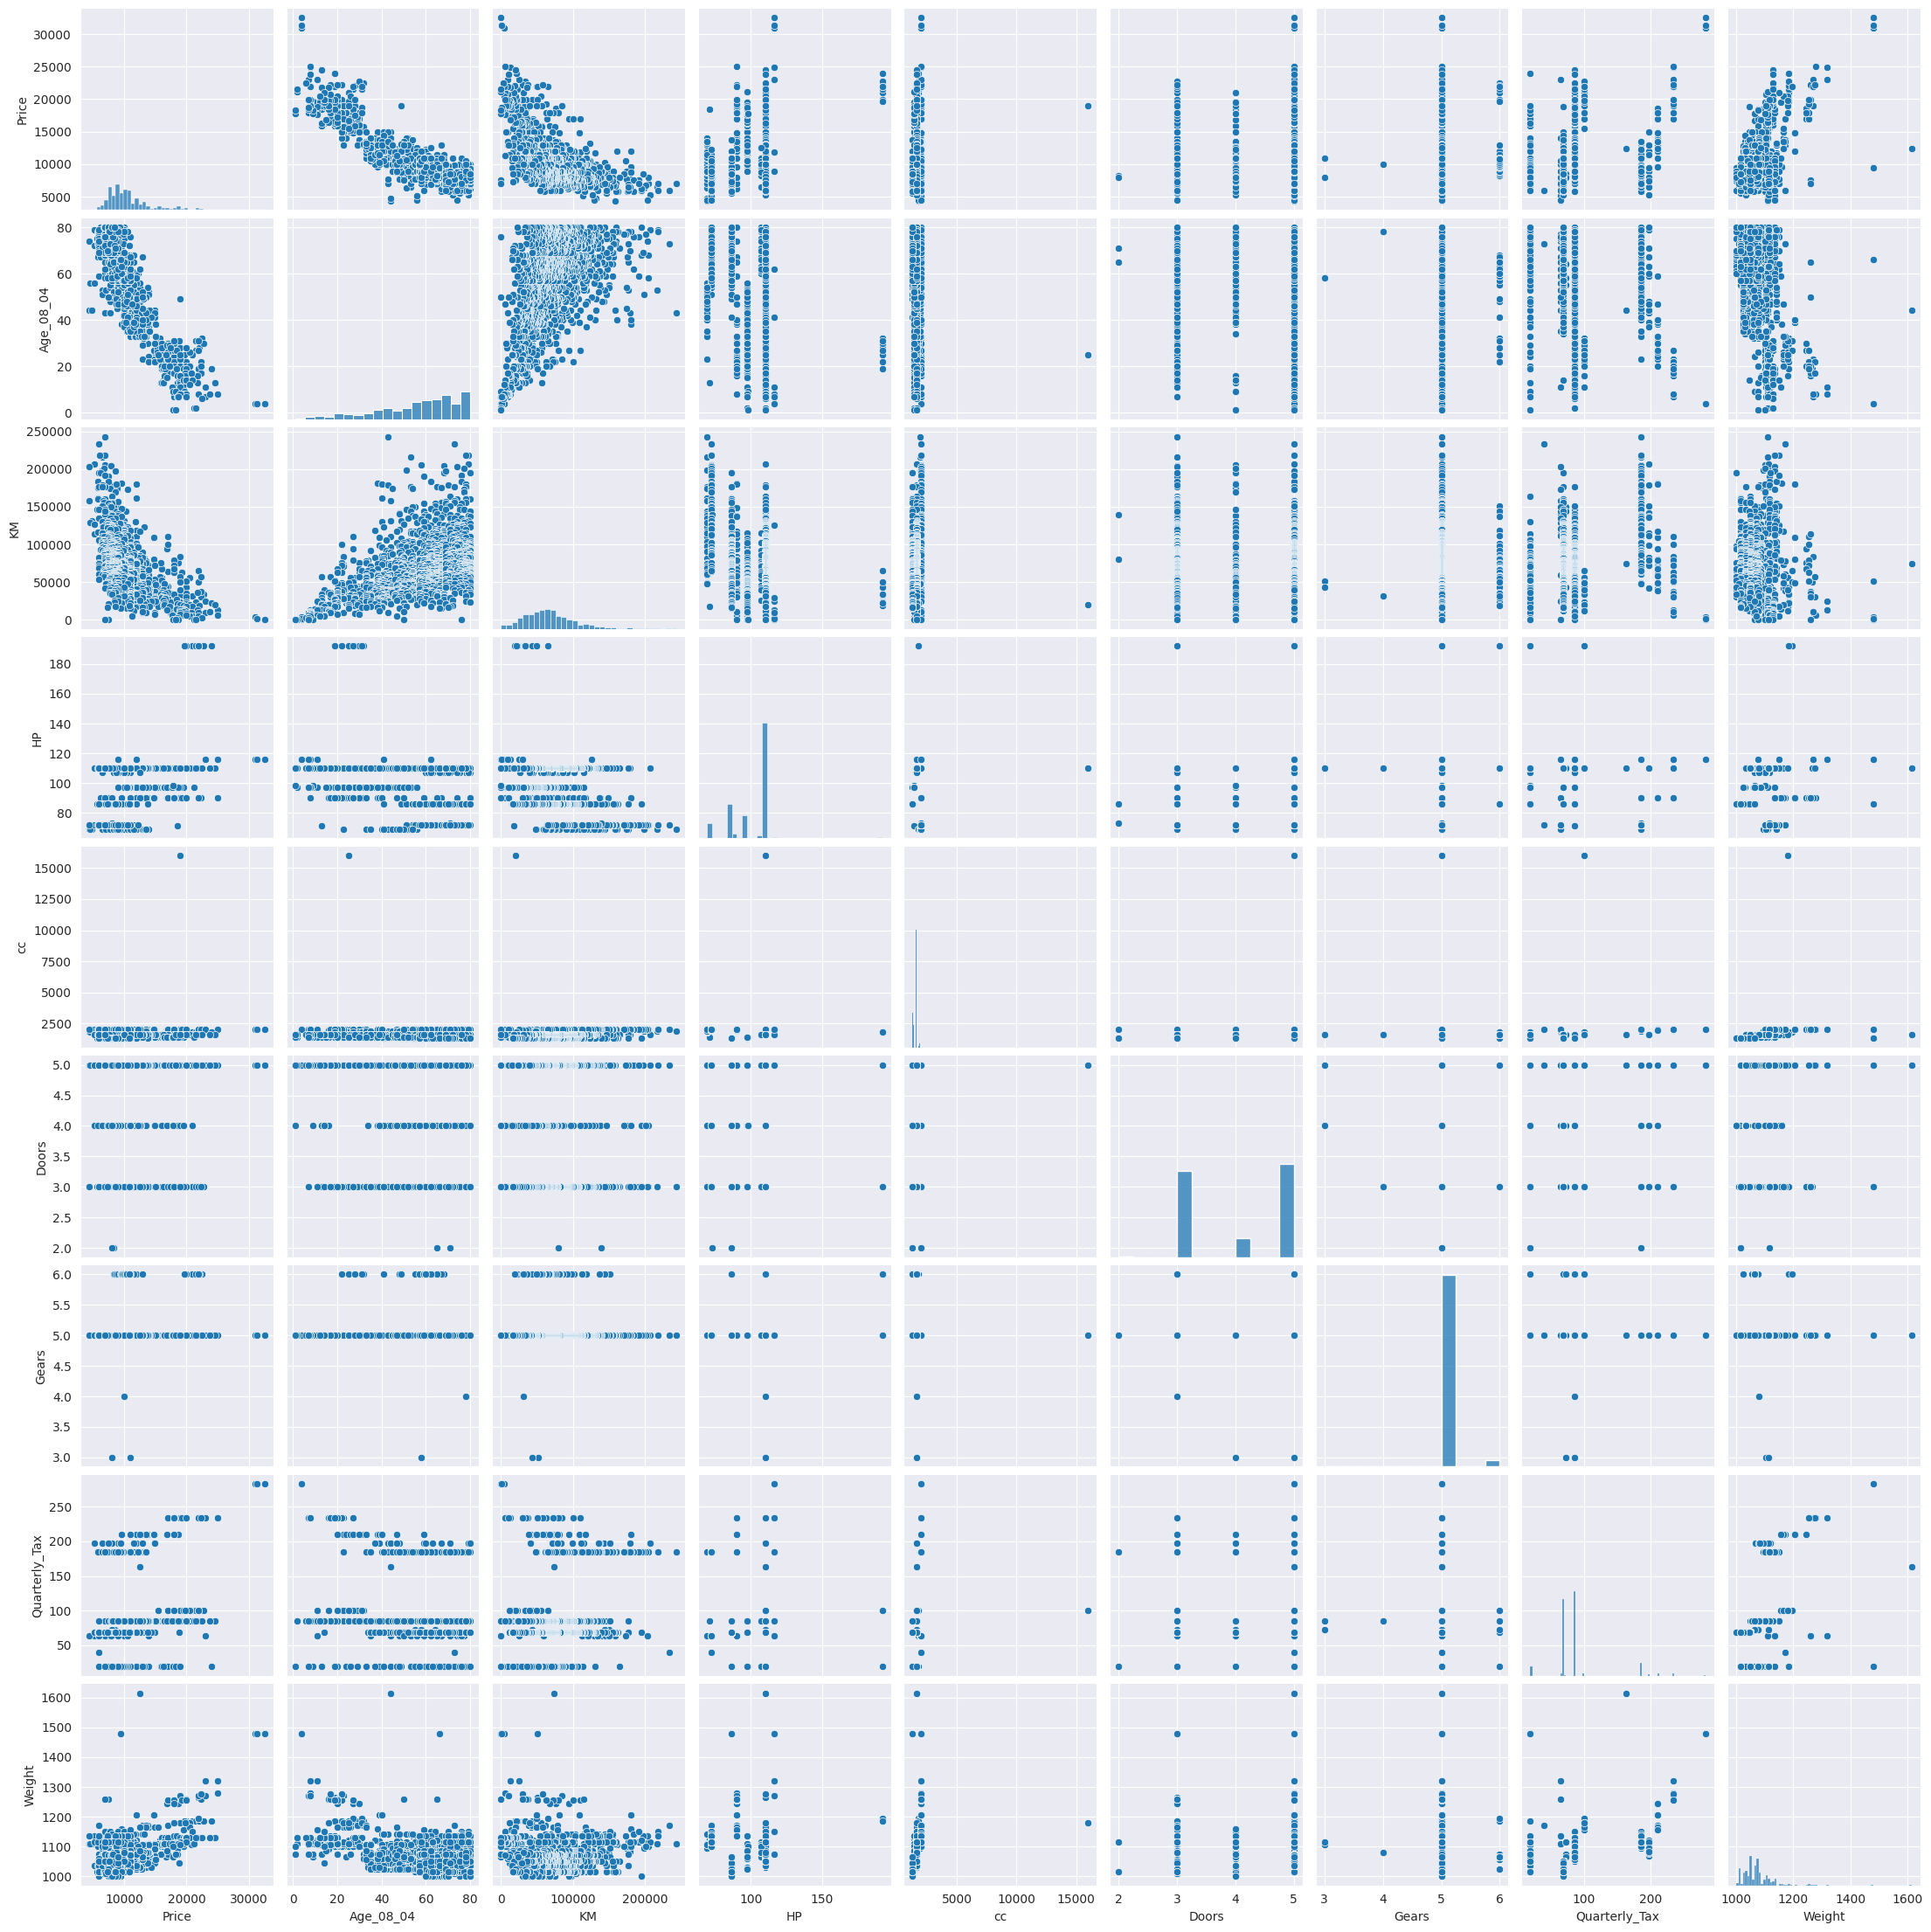

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(toyota2)

<Axes: >

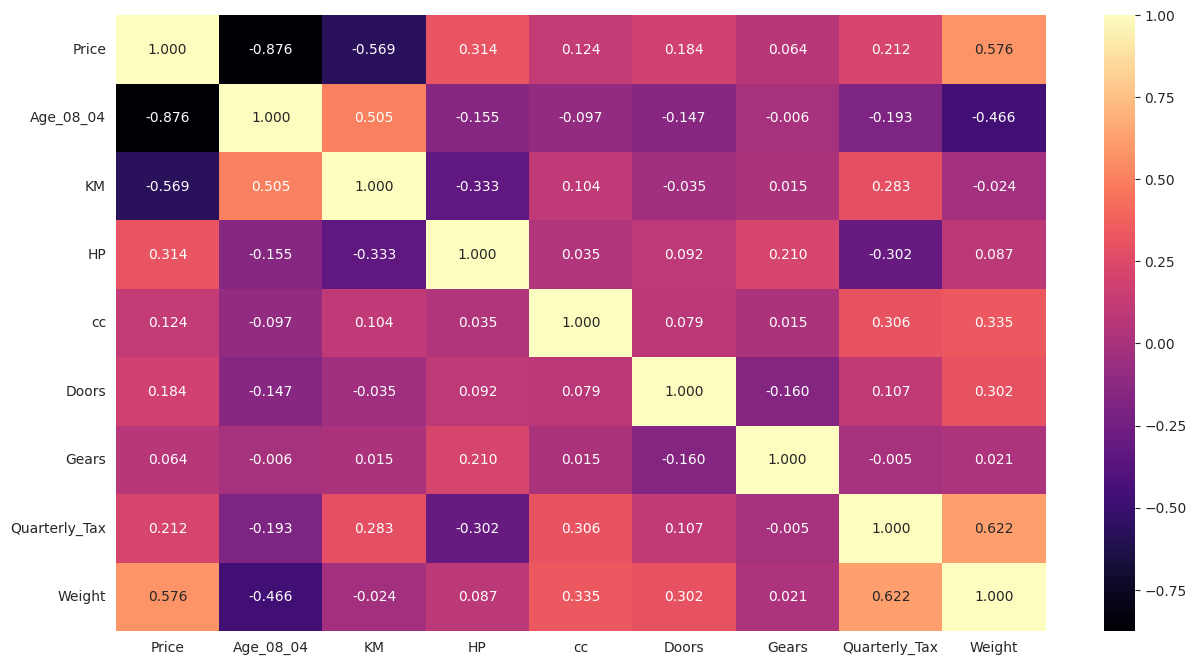

In [ ]:
 #Heatmap
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(toyota2.corr(), cmap='magma', annot=True, fmt=".3f")

Model1-Creating a model for better prediction of the car price without using any transformati

In [ ]:
model1 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data = toyota2).fit()

In [ ]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Fri, 29 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:48:56   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age_08_04      -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM               -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP               31.5846      2.818     11.210      0.000      26.058      37.112
cc               -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors            -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears           597.7159    196.969      3.035      0.002     211.335     984.097
Quarterly_Tax     3.8588      1.311      2.944      0.003       1.288       6.430
Weight           16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Coefficentsts
model1.params

Intercept       -5472.540368
Age_08_04        -121.713891
KM                 -0.020737
HP                 31.584612
cc                 -0.118558
Doors              -0.920189
Gears             597.715894
Quarterly_Tax       3.858805
Weight             16.855470
dtype: float64

In [ ]:
#print t and p-Values
print(model1.tvalues, '\n', model1.pvalues)

Intercept        -3.875273
Age_08_04       -46.551876
KM              -16.552424
HP               11.209719
cc               -1.316436
Doors            -0.023012
Gears             3.034563
Quarterly_Tax     2.944198
Weight           15.760663
dtype: float64 
 Intercept         1.113392e-04
Age_08_04        1.879217e-288
KM                1.994713e-56
HP                5.211155e-28
cc                1.882393e-01
Doors             9.816443e-01
Gears             2.452430e-03
Quarterly_Tax     3.290363e-03
Weight            1.031118e-51
dtype: float64


In [ ]:
#R squared values and adjusted rsquared value
(model1.rsquared,model1.rsquared_adj)

(0.8625200256947001, 0.8617487495415147)

Test for Normality of Residuals (Q-Q Plot)

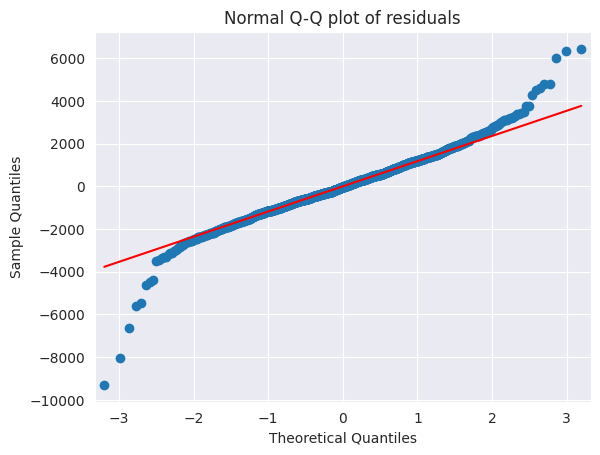

In [ ]:
qqplot=sm.qqplot(model1.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
list(np.where(model1.resid<-4000))

[array([190, 191, 220, 392, 401, 600, 653, 959])]

In [ ]:
list(np.where(model1.resid>4000))

[array([ 109,  110,  111,  124,  146,  170,  522, 1057])]

Residual plot for homoscedasticity

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

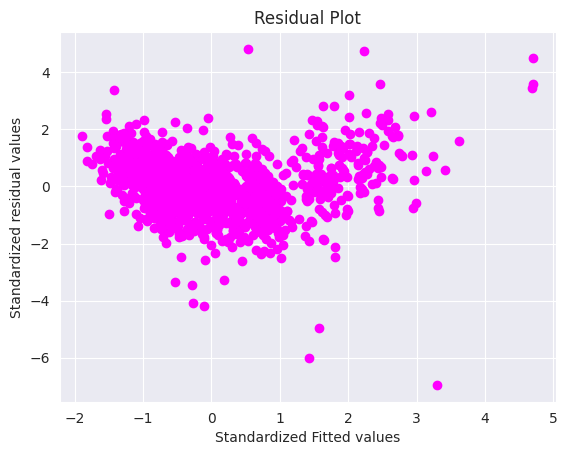

In [ ]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid),color='magenta')

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [ ]:
toyota3= toyota2.drop(toyota2.index[[109,110,111,124,146,170,190,191,220,392,401,522,600,653,959,1057]],axis=0).reset_index()

In [ ]:
toyota3= toyota3.drop(['index'],axis=1)

Model2-New model with the dataset(toyota4) where changed the extreme datas

In [ ]:
model2 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data = toyota3).fit()

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     1325.
Date:                Fri, 29 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:53:43   Log-Likelihood:                -12042.
No. Observations:                1419   AIC:                         2.410e+04
Df Residuals:                    1410   BIC:                         2.415e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.281e+04   1458.915     -8.779      0.000   -1.57e+04   -9946.344
Age_08_04      -114.9859      2.417    -47.568      0.000    -119.728    -110.244
KM               -0.0200      0.001    -17.773      0.000      -0.022      -0.018
HP               20.8295      2.586      8.054      0.000      15.756      25.903
cc               -0.1586      0.080     -1.981      0.048      -0.316      -0.002
Doors           -73.5254     36.164     -2.033      0.042    -144.467      -2.584
Gears           649.4229    172.976      3.754      0.000     310.105     988.741
Quarterly_Tax    -4.2058      1.298     -3.240      0.001      -6.752      -1.659
Weight           25.0748      1.268     19.773      0.000      22.587      27.562
==============================================================================
Omnibus:                        5.850   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                6.526
Skew:                           0.082   Prob(JB):                       0.0383
Kurtosis:                       3.289   Cond. No.                     3.65e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.65e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Coefficentsts
model2.params

Intercept       -12808.221259
Age_08_04         -114.985869
KM                  -0.019954
HP                  20.829527
cc                  -0.158566
Doors              -73.525448
Gears              649.422863
Quarterly_Tax       -4.205781
Weight              25.074827
dtype: float64

In [ ]:
#print t and p-Values
print(model1.tvalues, '\n', model1.pvalues)

Intercept        -3.875273
Age_08_04       -46.551876
KM              -16.552424
HP               11.209719
cc               -1.316436
Doors            -0.023012
Gears             3.034563
Quarterly_Tax     2.944198
Weight           15.760663
dtype: float64 
 Intercept         1.113392e-04
Age_08_04        1.879217e-288
KM                1.994713e-56
HP                5.211155e-28
cc                1.882393e-01
Doors             9.816443e-01
Gears             2.452430e-03
Quarterly_Tax     3.290363e-03
Weight            1.031118e-51
dtype: float64


In [ ]:
#R squared values and adjusted rsquared value
(model1.rsquared,model1.rsquared_adj)

(0.8625200256947001, 0.8617487495415147)

Cook’s Distance- to check the influencers /outliers

In [ ]:
model2_influence = model2.get_influence()
(c, _) = model2_influence.cooks_distance

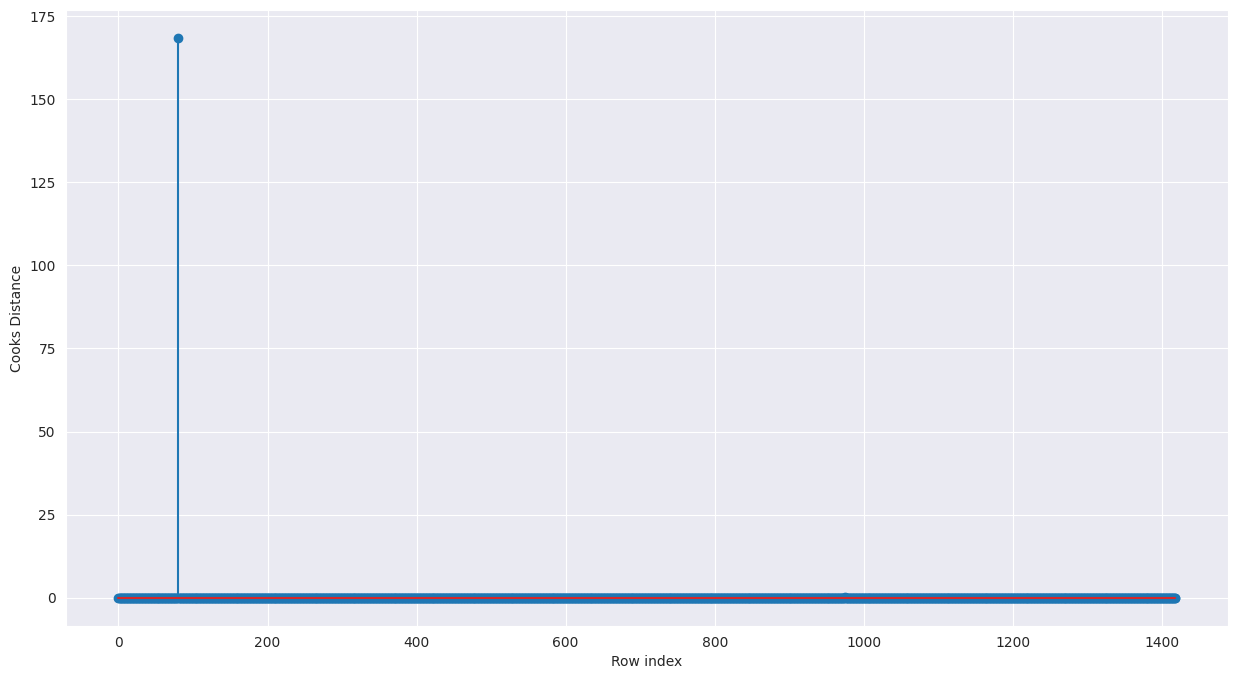

In [ ]:
fig = plt.subplots(figsize=(15, 8))
plt.stem(np.arange(len(toyota3)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#index and value of outliers
(np.argmax(c),np.max(c))

(80, 168.4854878268442)

In [ ]:
k = toyota3.shape[1]
n = toyota3.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.021141649048625793

Removing the data at index 80 from the dataset

In [ ]:
toyota4= toyota3.drop(toyota3.index[[80]],axis=0).reset_index()

In [ ]:
toyota4= toyota4.drop(['index'],axis=1)
toyota4.head(5)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


Model3-Improve model using new data by droping the outlier toyota4

In [ ]:
model3 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data = toyota4).fit()

In [ ]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     1445.
Date:                Fri, 29 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:57:47   Log-Likelihood:                -11977.
No. Observations:                1418   AIC:                         2.397e+04
Df Residuals:                    1409   BIC:                         2.402e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.622e+04   1435.062    -11.300      0.000    -1.9e+04   -1.34e+04
Age_08_04      -110.6898      2.354    -47.019      0.000    -115.308    -106.072
KM               -0.0169      0.001    -15.231      0.000      -0.019      -0.015
HP               29.9245      2.619     11.428      0.000      24.788      35.061
cc               -3.2624      0.294    -11.115      0.000      -3.838      -2.687
Doors          -134.9626     35.177     -3.837      0.000    -203.968     -65.957
Gears           531.3663    166.454      3.192      0.001     204.842     857.891
Quarterly_Tax     1.3796      1.347      1.024      0.306      -1.262       4.021
Weight           31.8442      1.366     23.320      0.000      29.166      34.523
==============================================================================
Omnibus:                        8.891   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.012   Jarque-Bera (JB):               10.119
Skew:                           0.119   Prob(JB):                      0.00635
Kurtosis:                       3.338   Cond. No.                     3.74e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Coefficentsts
model3.params

Intercept       -16215.645170
Age_08_04         -110.689777
KM                  -0.016945
HP                  29.924453
cc                  -3.262393
Doors             -134.962566
Gears              531.366319
Quarterly_Tax        1.379616
Weight              31.844244
dtype: float64

In [ ]:
#print t and p-Values
print(model3.tvalues, '\n', model3.pvalues)

Intercept       -11.299616
Age_08_04       -47.019147
KM              -15.231276
HP               11.427980
cc              -11.115197
Doors            -3.836624
Gears             3.192269
Quarterly_Tax     1.024397
Weight           23.320487
dtype: float64 
 Intercept         2.107660e-28
Age_08_04        5.607602e-291
KM                1.305297e-48
HP                5.483543e-29
cc                1.426937e-27
Doors             1.302522e-04
Gears             1.442773e-03
Quarterly_Tax     3.058236e-01
Weight           5.451841e-102
dtype: float64


In [ ]:
#R squared values and adjusted rsquared value
(model3.rsquared,model3.rsquared_adj)

(0.8913407004357697, 0.8907237562224881)

Stem plot- for plotting the influencers

In [ ]:
model3_influence = model3.get_influence()
(c, _) = model3_influence.cooks_distance

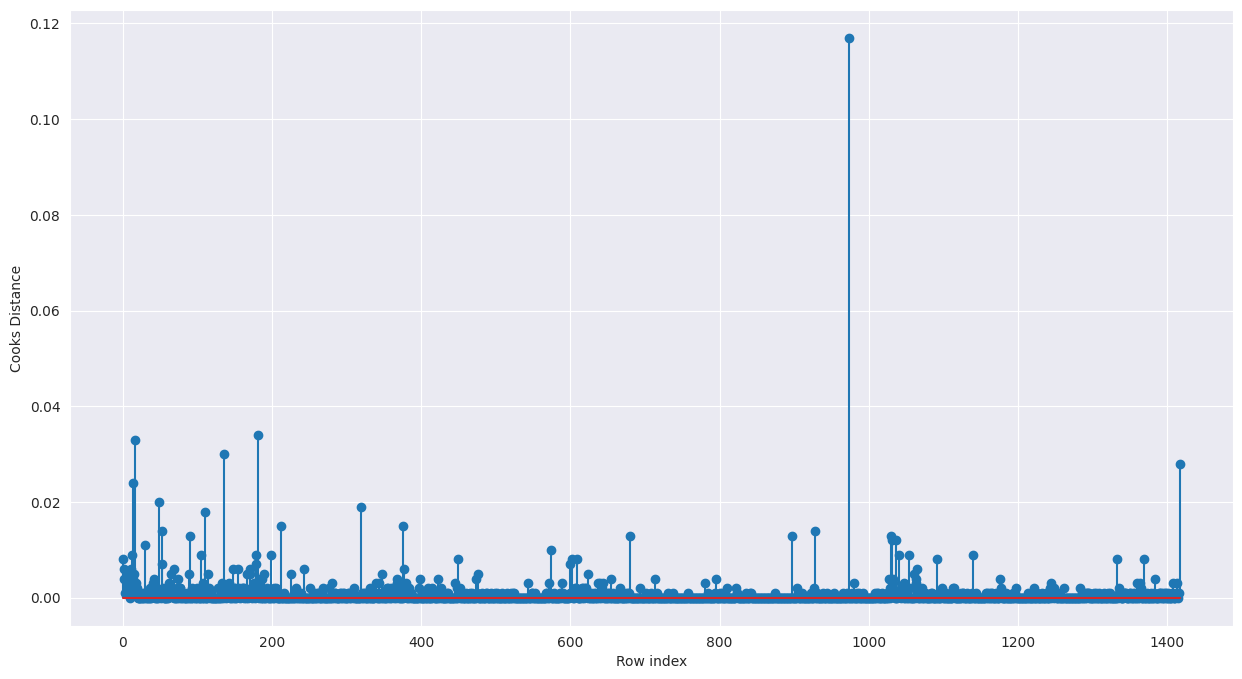

In [ ]:
fig = plt.subplots(figsize=(15, 8))
plt.stem(np.arange(len(toyota4)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#index and value of outliers
(np.argmax(c),np.max(c))

(974, 0.11665661388520678)

it is evident from the above stem plot that data point at index 974 is an outlier. So for better result we will remove the outlier

In [ ]:
toyota5= toyota4.drop(toyota4.index[[974]],axis=0).reset_index()
toyota5= toyota5.drop(['index'],axis=1)

Model4: Another model using new data toyota6, by removing the outlier at index 974

In [ ]:
model4 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data = toyota5).fit()

In [ ]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     1455.
Date:                Fri, 29 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:01:34   Log-Likelihood:                -11964.
No. Observations:                1417   AIC:                         2.395e+04
Df Residuals:                    1408   BIC:                         2.399e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.569e+04   1440.268    -10.892      0.000   -1.85e+04   -1.29e+04
Age_08_04      -110.3879      2.349    -47.001      0.000    -114.995    -105.781
KM               -0.0169      0.001    -15.269      0.000      -0.019      -0.015
HP               30.4886      2.616     11.653      0.000      25.356      35.621
cc               -3.2922      0.293    -11.246      0.000      -3.866      -2.718
Doors          -144.2598     35.189     -4.100      0.000    -213.288     -75.231
Gears           364.8142    174.098      2.095      0.036      23.295     706.333
Quarterly_Tax     1.3355      1.343      0.995      0.320      -1.298       3.969
Weight           32.1468      1.365     23.559      0.000      29.470      34.824
==============================================================================
Omnibus:                        9.350   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               10.478
Skew:                           0.131   Prob(JB):                      0.00531
Kurtosis:                       3.330   Cond. No.                     3.76e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.76e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Coefficentsts
model4.params

Intercept       -15686.782567
Age_08_04         -110.387932
KM                  -0.016934
HP                  30.488552
cc                  -3.292157
Doors             -144.259806
Gears              364.814159
Quarterly_Tax        1.335513
Weight              32.146803
dtype: float64

In [ ]:
#print t and p-Values
print(model4.tvalues, '\n', model4.pvalues)

Intercept       -10.891575
Age_08_04       -47.001242
KM              -15.269306
HP               11.653239
cc              -11.246479
Doors            -4.099563
Gears             2.095456
Quarterly_Tax     0.994752
Weight           23.558765
dtype: float64 
 Intercept         1.403314e-26
Age_08_04        9.193563e-291
KM                7.962343e-49
HP                5.021743e-30
cc                3.673412e-28
Doors             4.375836e-05
Gears             3.630868e-02
Quarterly_Tax     3.200280e-01
Weight           9.978601e-104
dtype: float64


In [ ]:
#R squared values and adjusted rsquared value
(model4.rsquared,model4.rsquared_adj)

(0.8920578323862008, 0.8914445246156679)

Conclusion:Comparing all models , It is convenient that the model 4 with higher R-squared value, lower AIC value of 2.395e+04 .Hence, to predict the Price of the car model 4 is better